In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [ ]:
with open('assets/'keyword.pkl', 'rb') as f:
    # Load the numpy array from the file
    embeddings = pickle.load(f)

In [ ]:
def kmeans_clustering(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(embeddings)
    return kmeans_labels

In [ ]:
def agglomerative_clustering(embeddings, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(embeddings)
    return agglomerative_labels

In [ ]:
def spectral_clustering(embeddings, n_clusters):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    spectral_labels = spectral.fit_predict(embeddings)
    return spectral_labels

In [ ]:
n_clusters = 6

# Perform clustering
kmeans_labels = kmeans_clustering(embeddings, n_clusters)
spectral_labels = spectral_clustering(embeddings, n_clusters)
agglomerative_labels = agglomerative_clustering(embeddings, n_clusters)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


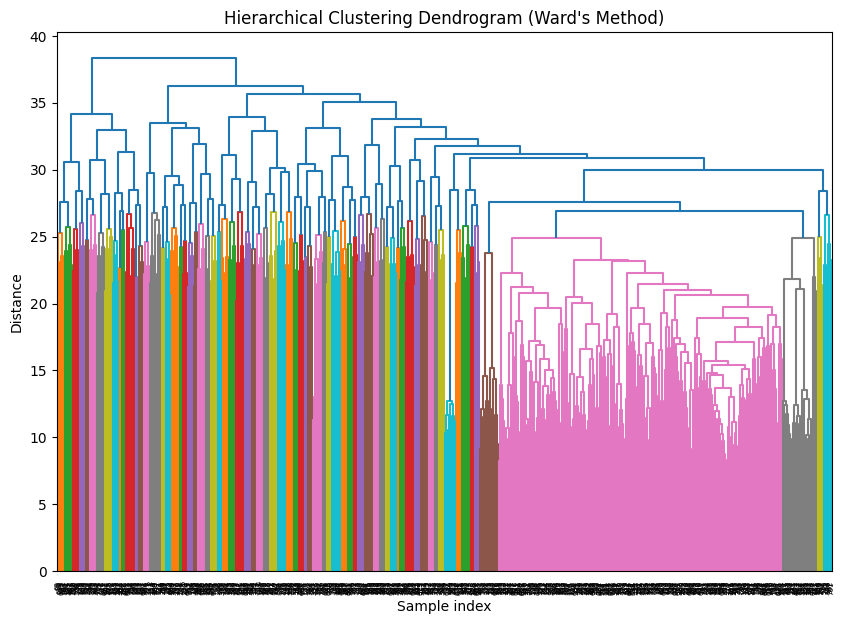

In [ ]:
scaler = StandardScaler()
embeddings_normalized = scaler.fit_transform(embeddings)

# Compute the linkage matrix using the 'ward' method
Z = linkage(embeddings_normalized, method='ward')

# Plot the dendrogram
def plot_dendrogram(Z, title):
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(title)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(Z, 'Hierarchical Clustering Dendrogram (Ward\'s Method)')

In [ ]:
def print_clustered_papers(n_clusters: int,cluster_labels , path: str):

    # kmeans: KMeans
    cluster_dict = {}
    for i, label in enumerate(cluster_labels):
        # Add data point to the corresponding cluster in the dictionary
        if label not in cluster_dict:
            cluster_dict[label] = []
        cluster_dict[label].append(i)
    df = pd.read_csv('assets/path, encoding='utf-8')
    titles = df['Title']
    keywords = df['Keywords']
    for c_i in range(n_clusters):
        print('CLUSTER ' + str(c_i))
        bi = 10
        for i in cluster_dict.get(c_i):
            print(titles[i])
            print('\n', keywords[i])
            print('--------------------------')
            bi -= 1
            if bi == 0:
              break
        print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    for x in cluster_dict.keys():
      print(len(cluster_dict[x]))


In [ ]:
print_clustered_papers(6, kmeans_labels, r'articles.csv')

CLUSTER 0
اثر سیاست پولی بر پایداری اقتصاد کلان در ایران در مدل های نوکینزی رفتاری و متعارف

 ['افق زمانی محدود', 'مدل نوکینزی', 'برآورد بیزی', 'یادگیری', 'سیاست پولی']
--------------------------
بررسی تاثیر نرخ ارز بر رفتار رمه‌ای در بورس اوراق بهادار تهران: کاربردی از رویکرد FAVAR

 ['بازار سهام', 'رفتار رمه\u200cای', 'رویکرد FAVAR', 'نرخ ارز']
--------------------------
بررسی تاثیر ریسک کشوری و ردپای اکولوژیکی بر تقاضای گردشگری در ایران

 ['تقاضای گردشگری', 'ریسک کشوری', 'ردپای اکولوژیکی', 'رگرسیون چندکی', 'ایران']
--------------------------
تحلیل اثر رانت نفت بر رفاه اقتصادی در ایران، با تأکید بر اقتصاد زیرزمینی

 ['اقتصاد زیرزمینی', 'ایران', 'خودرگرسیونی با وقفه\u200cهای توزیعی غیرخطی', 'رانت نفت', 'رفاه اقتصادی']
--------------------------
آثار حقیقی کارکرد بانک به‌عنوان خالق نقدینگی از مجاری وام‌دهی و استمهال صوری مطالبات غیرجاری: رهیافت DSGE

 ['استمهال مطالبات غیرجاری', 'خلق اعتبار در بانکداری', 'ضریب فزاینده', 'الگوی DSGE']
--------------------------
بررسی تأثیر تکنولوژی، نوآ

In [ ]:
print_clustered_papers(6, agglomerative_labels, r'articles.csv')

CLUSTER 0
اثر سیاست پولی بر پایداری اقتصاد کلان در ایران در مدل های نوکینزی رفتاری و متعارف

 ['افق زمانی محدود', 'مدل نوکینزی', 'برآورد بیزی', 'یادگیری', 'سیاست پولی']
--------------------------
بررسی تاثیر نرخ ارز بر رفتار رمه‌ای در بورس اوراق بهادار تهران: کاربردی از رویکرد FAVAR

 ['بازار سهام', 'رفتار رمه\u200cای', 'رویکرد FAVAR', 'نرخ ارز']
--------------------------
ارزیابی مفهوم انباشت نیروی کار و بررسی وجود احتمالی این پدیده در اقتصاد ایران

 ['اشتغال', 'بهره\u200cوری نیروی کار', 'بیکاری پنهان', 'مازاد نیروی کار']
--------------------------
بررسی تاثیر ریسک کشوری و ردپای اکولوژیکی بر تقاضای گردشگری در ایران

 ['تقاضای گردشگری', 'ریسک کشوری', 'ردپای اکولوژیکی', 'رگرسیون چندکی', 'ایران']
--------------------------
نقش نرخ اسمی ارز و قیمت‌های نسبی در بازگشت برابری قدرت خرید در ایران

 ['برابری قدرت خرید', 'توابع واکنش آنی', 'مدل تصحیح خطای برداری', 'نرخ همگرایی']
--------------------------
ارزیابی اثرات تشکیل مرکز لجستیک در استان اصفهان بر اقتصاد منطقه‌ای مبتنی بر مدل تعادل عمومی

In [ ]:
print_clustered_papers(6, spectral_labels, r'articles.csv')

CLUSTER 0
بررسی رونق و رکود اقتصادی سالهای 1390 و 1395 براساس ضرایب سرمایه‌ای در مدل داده ستانده پویای ملّی

 ['تحلیل پویا', 'سرمایه', 'مدل داده ستانده']
--------------------------
اثر سیاست پولی بر پایداری اقتصاد کلان در ایران در مدل های نوکینزی رفتاری و متعارف

 ['افق زمانی محدود', 'مدل نوکینزی', 'برآورد بیزی', 'یادگیری', 'سیاست پولی']
--------------------------
بررسی عوامل مؤثر بر قتل با تأکید بر متغیرهای اقتصادی و برابری جنسیتی

 ['آموزش', 'استان\u200cهای ایران', 'بازار کار', 'برابری جنسیتی', 'قتل']
--------------------------
در جست و جوی شادمانی: ساختار شادمانی براساس عوامل اقتصادی و غیراقتصادی

 ['اقتصاد رفتاری', 'شادمانی', 'متغیرهای اقتصادی', 'متغیرهای غیراقتصادی', 'مدل معادلات ساختاری']
--------------------------
بررسی تاثیر نرخ ارز بر رفتار رمه‌ای در بورس اوراق بهادار تهران: کاربردی از رویکرد FAVAR

 ['بازار سهام', 'رفتار رمه\u200cای', 'رویکرد FAVAR', 'نرخ ارز']
--------------------------
تأثیر همه‌گیری کووید-19 بر عرضه نیروی کار زنان در ایران

 ['اشتغال زنان', 'کووید-19', 'نی

#output
putting each article in respective cluster

In [ ]:
import pandas as pd

# Load the articles from the CSV file
articles_df = pd.read_csv('assets/'articles.csv')

# Assume cluster_labels is already defined
# For example, cluster_labels = [0, 1, 0, 2, 1, ...]

# Add cluster labels to the DataFrame
articles_df['cluster'] = kmeans_labels

# Get the number of clusters (K)
num_clusters = 6


# Save each cluster to a separate CSV file
for cluster_num in range(num_clusters):
    cluster_df = articles_df[articles_df['cluster'] == cluster_num]
    cluster_df.to_csv('assets/f'cluster_{cluster_num}.csv', index=False)

